In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
%%time
counts = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE70580/counts.csv', index_col=0, header=0, delimiter=',')
obs = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE70580/cellinfo.csv',index_col=0, header=0,delimiter=',')

CPU times: total: 30.6 s
Wall time: 30.6 s


In [3]:
counts

,CTD-2588J6.1,RP11-433M22.1,CTD-2588J6.2,RP13-100A9.2,MTVR2,RP3-415N12.1,PSMA2P2,RP11-433M22.2,ATRX,RP11-181G12.4,...,ERCC_3.66210938:mix1_7.32421875:mix2.1,ERCC_1.83105469:mix1_3.66210938:mix2,ERCC_0.91552734:mix1_1.83105469:mix2,ERCC_0.91552734:mix1_1.83105469:mix2.1,ERCC_0.45776367:mix1_0.91552734:mix2,ERCC_0.22888184:mix1_0.45776367:mix2,ERCC_0.22888184:mix1_0.45776367:mix2.1,ERCC_0.11444092:mix1_0.22888184:mix2,ERCC_0.05722046:mix1_0.11444092:mix2,ERCC_0.01430512:mix1_0.02861023:mix2
GSM1810510_T74_P1_A9_ILC1_expression,0,0,0,0,0,0,6,0,2,0,...,0,0,0,0,0,0,0,0,0,0
GSM1810511_T74_P1_B4_NK_expression,0,0,0,0,0,0,0,0,853,0,...,1,0,2,2,0,0,0,0,0,0
GSM1810512_T74_P1_B7_ILC2_expression,0,0,0,0,0,0,21,0,2116,0,...,0,0,1,0,0,0,0,0,0,0
GSM1810513_T74_P1_B9_NK_expression,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
GSM1810514_T74_P1_D10_ILC2_expression,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1811159_T86_P4_H2_ILC3_expression,0,0,0,0,0,0,7,0,0,0,...,0,0,2,1,0,0,0,0,0,0
GSM1811160_T86_P4_H3_ILC3_expression,0,10,0,0,0,0,3,0,0,0,...,0,0,1,0,0,0,0,0,0,0
GSM1811161_T86_P4_H4_ILC3_expression,0,0,0,0,0,0,0,0,461,0,...,0,0,0,0,0,0,0,0,0,0
GSM1811162_T86_P4_H5_ILC3_expression,0,0,0,0,0,0,3,0,1,0,...,0,0,0,1,3,0,0,0,0,0


In [4]:
obs

,cell_type
GSM1810510_T74_P1_A9_ILC1_expression,ILC1
GSM1810511_T74_P1_B4_NK_expression,NK
GSM1810512_T74_P1_B7_ILC2_expression,ILC2
GSM1810513_T74_P1_B9_NK_expression,NK
GSM1810514_T74_P1_D10_ILC2_expression,ILC2
...,...
GSM1811159_T86_P4_H2_ILC3_expression,ILC3
GSM1811160_T86_P4_H3_ILC3_expression,ILC3
GSM1811161_T86_P4_H4_ILC3_expression,ILC3
GSM1811162_T86_P4_H5_ILC3_expression,ILC3


In [12]:
adata = sc.AnnData(X=counts, obs=obs)

C:\Users\23247\AppData\Local\Temp\ipykernel_2724\1923552843.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts, obs=obs)


In [13]:
adata.obs['cell_type']=adata.obs['cell_type'].replace(['ILC1', 'ILC2', 'ILC3'], 'ILC')

In [14]:
adata.obs['cell_type'].value_counts()

ILC    574
NK      74
Name: cell_type, dtype: int64

In [15]:
adata.obs['label']=adata.obs['cell_type']

In [16]:
adata.obs

,cell_type,label
GSM1810510_T74_P1_A9_ILC1_expression,ILC,ILC
GSM1810511_T74_P1_B4_NK_expression,NK,NK
GSM1810512_T74_P1_B7_ILC2_expression,ILC,ILC
GSM1810513_T74_P1_B9_NK_expression,NK,NK
GSM1810514_T74_P1_D10_ILC2_expression,ILC,ILC
...,...,...
GSM1811159_T86_P4_H2_ILC3_expression,ILC,ILC
GSM1811160_T86_P4_H3_ILC3_expression,ILC,ILC
GSM1811161_T86_P4_H4_ILC3_expression,ILC,ILC
GSM1811162_T86_P4_H5_ILC3_expression,ILC,ILC


In [17]:
adata.X = sparse.csr_matrix(adata.X)

In [18]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [15]:
adata = adata[adata.obs.total_counts < 75000, :]

In [19]:
adata

AnnData object with n_obs × n_vars = 648 × 64535
    obs: 'cell_type', 'label', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [21]:
adata

AnnData object with n_obs × n_vars = 648 × 26104
    obs: 'cell_type', 'label', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

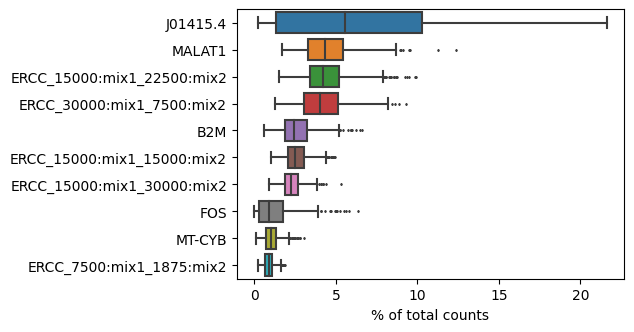

In [22]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [23]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

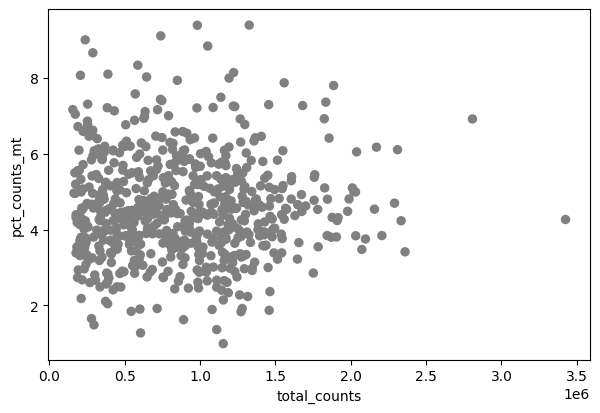

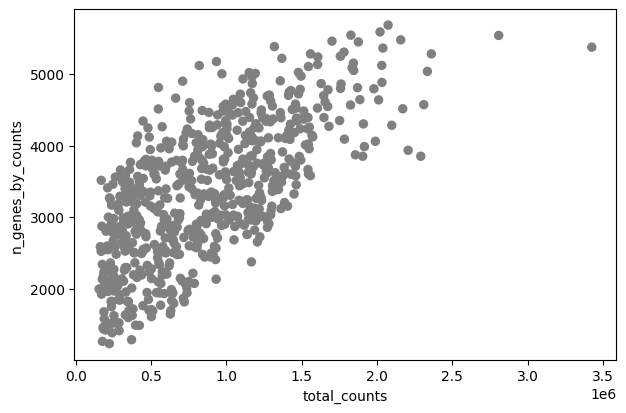

In [24]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [25]:
adata.raw = adata

In [26]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/ILC/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/ILC/processed')

adata.write('D:/MyData/scEDGE_Generation/data/ILC/processed/ILC.h5ad')

In [27]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var 

In [28]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/ILC/processed/ILC_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/ILC/processed/ILC_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/ILC/processed/ILC_expression_matrix.mtx', expression_matrix)

### Top2000

In [29]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

In [30]:
adata_top = adata[:, adata.var.highly_variable]

In [31]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed/ILC_top2000.h5ad')

In [32]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [33]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed/ILC_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed/ILC_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/ILC_top2000/processed/ILC_expression_matrix_top2000.mtx', expression_matrix_top)